In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# Create an engine and connect to your SQLite database
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# Declare a Base using automap_base()
Base = automap_base()

# Reflect the tables
Base.prepare(autoload_with=engine)

# Print out the names of the tables that were reflected
print("Reflected tables:", Base.classes.keys())

Reflected tables: ['measurement', 'station']


In [7]:
# Map classes to the tables
# Adjust the table names according to your database
Measurement = Base.classes.measurement
Station = Base.classes.station

# Create a session
session = Session(engine)

# Exploratory Precipitation Analysis

In [19]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

In [22]:
# Find the most recent date in the data set.
session.query(func.max(Measurement.date)).first()

('2017-08-23',)

In [28]:
# Find the most recent date in the data set.
strDate = session.query(Measurement.date).all()[-1]
strDate

('2017-08-23',)

In [29]:
strDate = strDate[0]

Text(0, 0.5, 'Inches')

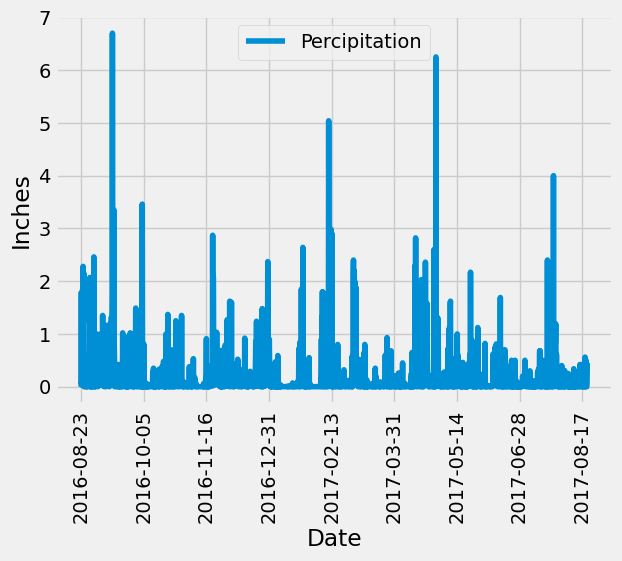

In [47]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
lastDate = dt.datetime.strptime(strDate, '%Y-%m-%d').date()

# Calculate the date one year from the last date in data set.
pre_year = lastDate - dt.timedelta(365)

# Perform a query to retrieve the data and precipitation scores
Results = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date >=pre_year).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(Results,columns = ["Date","Percipitation"])

# Sort the dataframe by date
df = df.sort_values("Date").dropna()


# Use Pandas Plotting with Matplotlib to plot the data
df.plot("Date","Percipitation",rot = 90)
plt.ylabel("Inches")


In [48]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,Percipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(Station.station)).all()

[(9,)]

In [57]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(Measurement.station,func.count()).group_by(Measurement.station).order_by(func.count().desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [62]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(
    func.min(Measurement.tobs),
    func.max(Measurement.tobs),
    func.avg(Measurement.tobs)
).filter(Measurement.station=='USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

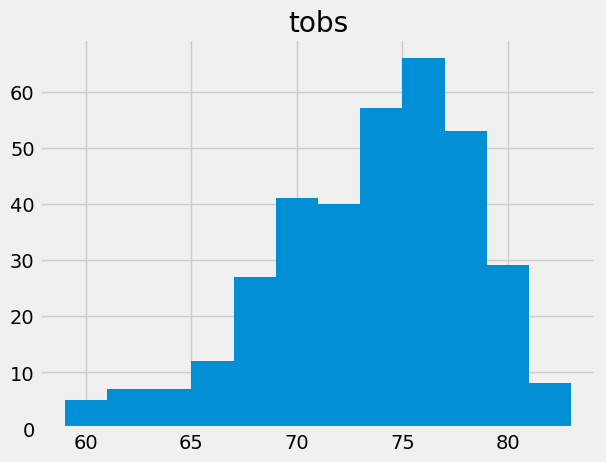

In [67]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
result = session.query(Measurement.tobs).filter((Measurement.station=='USC00519281')&(Measurement.date>=pre_year)).all()
pd.DataFrame(result).hist(bins=12);

# Close Session

In [44]:
# Close Session
session.close()